# 1. OBJETIVOS DA DISCIPLINA

Estudar os sinais bioelétricos utilizados em equipamentos médico-hospitalares e em pesquisa biomédica, identificando os tipos de sinais e de ruídos, os potenciais bioelétricos, os sensores e transdutores e exemplos de algoritmos utilizados no processamento digital dos sinais bioelétricos.

2. EMENTA DO PROGRAMA

    1. Principais sinais bioelétricos;
    2. Formação do sinal EMG;
    3. Aquisição de sinais bioelétricos;
    4. Digitalização de sinais;
    5. Introdução ao Matlab/Octave;
    6. Técnicas para redução de ruído em sinais biomédicos;
    7. Processamento e análise de sinais de EMG;
    8. Teoria de processamento digital de sinais.
    
3. Utilizando os sinais ECG e EM, realize as seguintes atividades:

a) No Domínio do Tempo:

	01: Leitura e gŕafico dos sinais ECG e EMG;
	02: Segmentação de um período do sinal ECG e EMG;
	03: Retificação, Normalização e regressão linear do sinal (EMG e ECG);
    
b) No Domínio da Frequência:

	04: Resposta em frequência e espectro de frequência dos sinais EMG e ECG;
	05: Aplicar o filtro Butterworth com frequência de corte em diferentes frequencias Hz; 
	06: Aplicar a FPM e RMS no sinal completo para cada bulha EMG.



XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

a) No Domínio do Tempo:

	01: Leitura e gŕafico dos sinais ECG e EMG;

In [1]:
# Carregando Bibliotecas
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd

In [2]:
# Funções de Leitura de sinais 
def lerecg(arquivo):
    f = open(arquivo,'r',encoding='latin-1')
    lines = f.readlines()[5:-8]
    f.close()
    ecg=[float(lines[k][1:-1]) for k in range(len(lines))]
    return ecg

def leremg(arquivo):
    f = open(arquivo,'r',encoding='latin-1')
    lines = f.readlines()
    f.close()
    positions=list(np.where(pd.DataFrame(lines)=='# columns: 1\n'))[0]
    sinal1=lines[positions[0]+1:positions[1]-1]
    emg=[float(sinal1[k][1:-1]) for k in range(len(sinal1)-4)]
    return emg

In [7]:
path="/home/mrclnndrd/Dropbox/UnB/Gama/Graduação/PDS/gitpds/"

ecg=lerecg(path+"ECG")
amostras_ecg=len(ecg)
fs=360
amostras_ecg/fs

tempo=np.arange(0,len(ecg)/fs,1/fs)
len(tempo)


7199

<IPython.core.display.Javascript object>


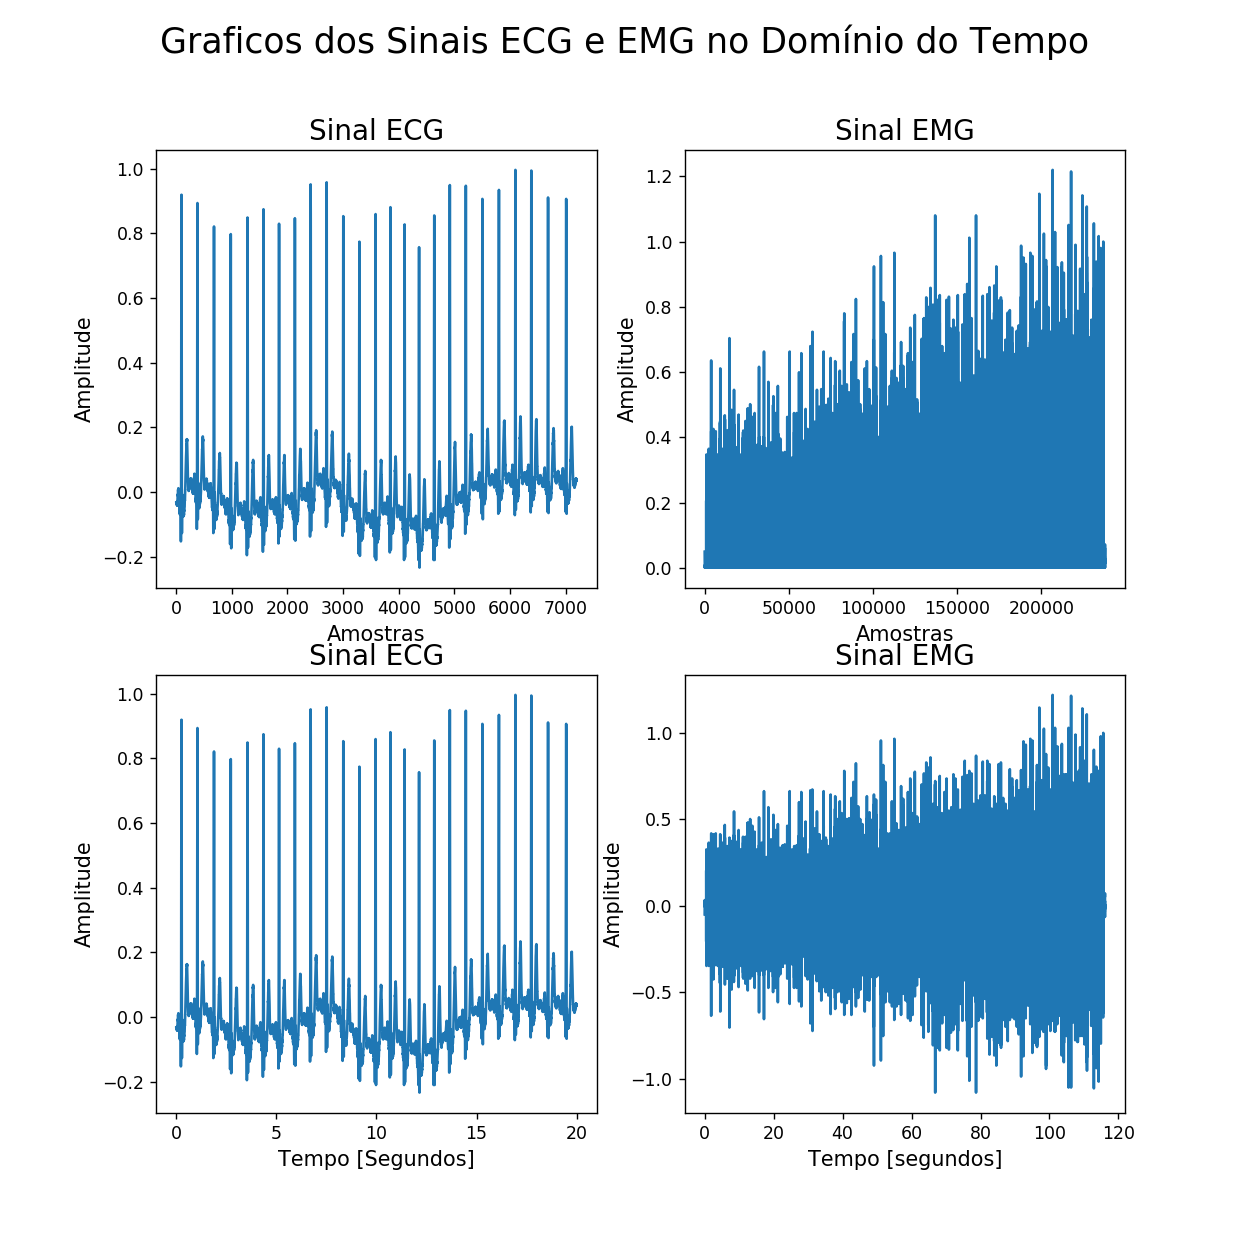

In [9]:
# Gráficos dos Sinais ECG e EMG

fig = plt.subplots(figsize=(10,10))

plt.suptitle('Graficos dos Sinais ECG e EMG no Domínio do Tempo', fontsize=20)

ax1=plt.subplot(2, 2, 1)
ecg=lerecg('ECG')    
ax1.plot(ecg)
ax1.set_xlabel("Amostras",fontsize=12)
ax1.set_title("Sinal ECG",fontsize=16)  
ax1.set_ylabel('Amplitude',fontsize=12)

ax2=plt.subplot(2, 2, 2)
emg=leremg('EMG')    
ax2.plot(np.abs(emg))
ax2.set_xlabel("Amostras",fontsize=12)
ax2.set_title("Sinal EMG",fontsize=16)  
ax2.set_ylabel('Amplitude',fontsize=12)

ax1=plt.subplot(2, 2, 3)
ecg=lerecg('ECG')    
fs=360
tempo=np.arange(0,len(ecg)/fs,1/fs)
ax1.plot(tempo,ecg)
ax1.set_xlabel("Tempo [Segundos]",fontsize=12)
ax1.set_title("Sinal ECG",fontsize=16)  
ax1.set_ylabel('Amplitude',fontsize=12)

ax2=plt.subplot(2, 2, 4)
fs=2048
tempo=np.arange(0,len(emg)/fs,1/fs)
ax2.plot(tempo,emg)
ax2.set_xlabel("Tempo [segundos]",fontsize=12)
ax2.set_title("Sinal EMG",fontsize=16)  
ax2.set_ylabel('Amplitude',fontsize=12)


plt.savefig(path+"Figura_1.jpeg",dpi=300)



XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

a) No Domínio do Tempo:

    02: Segmentação de um período do sinal ECG e EMG;

<IPython.core.display.Javascript object>


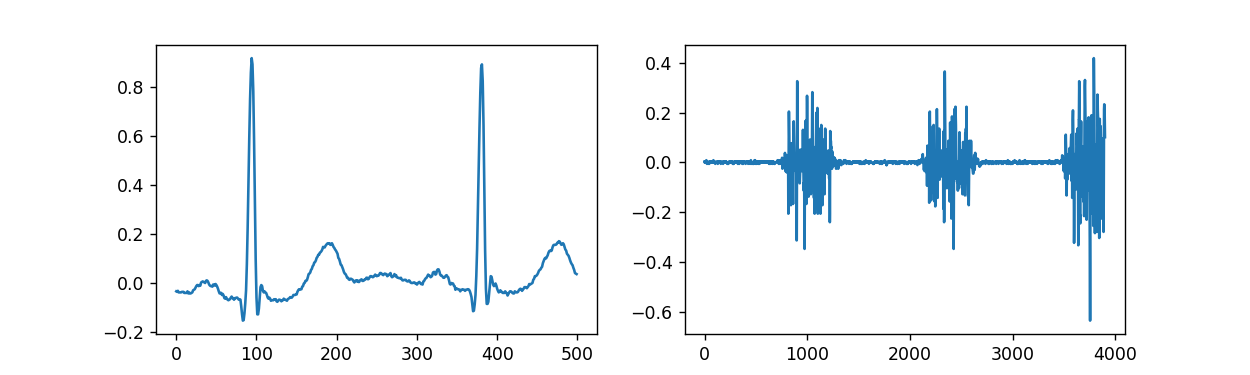

In [10]:
fig = plt.subplots(figsize=(10,3))

ax1=plt.subplot(1,2, 1)
ecg_seg=ecg[0:2*250]
ax1.plot(ecg_seg)

ax2=plt.subplot(1, 2, 2)
emg_seg=emg[100:2*2000]
ax2.plot(emg_seg)
plt.savefig(path+"Figura_2.jpeg",dpi=300)


<IPython.core.display.Javascript object>


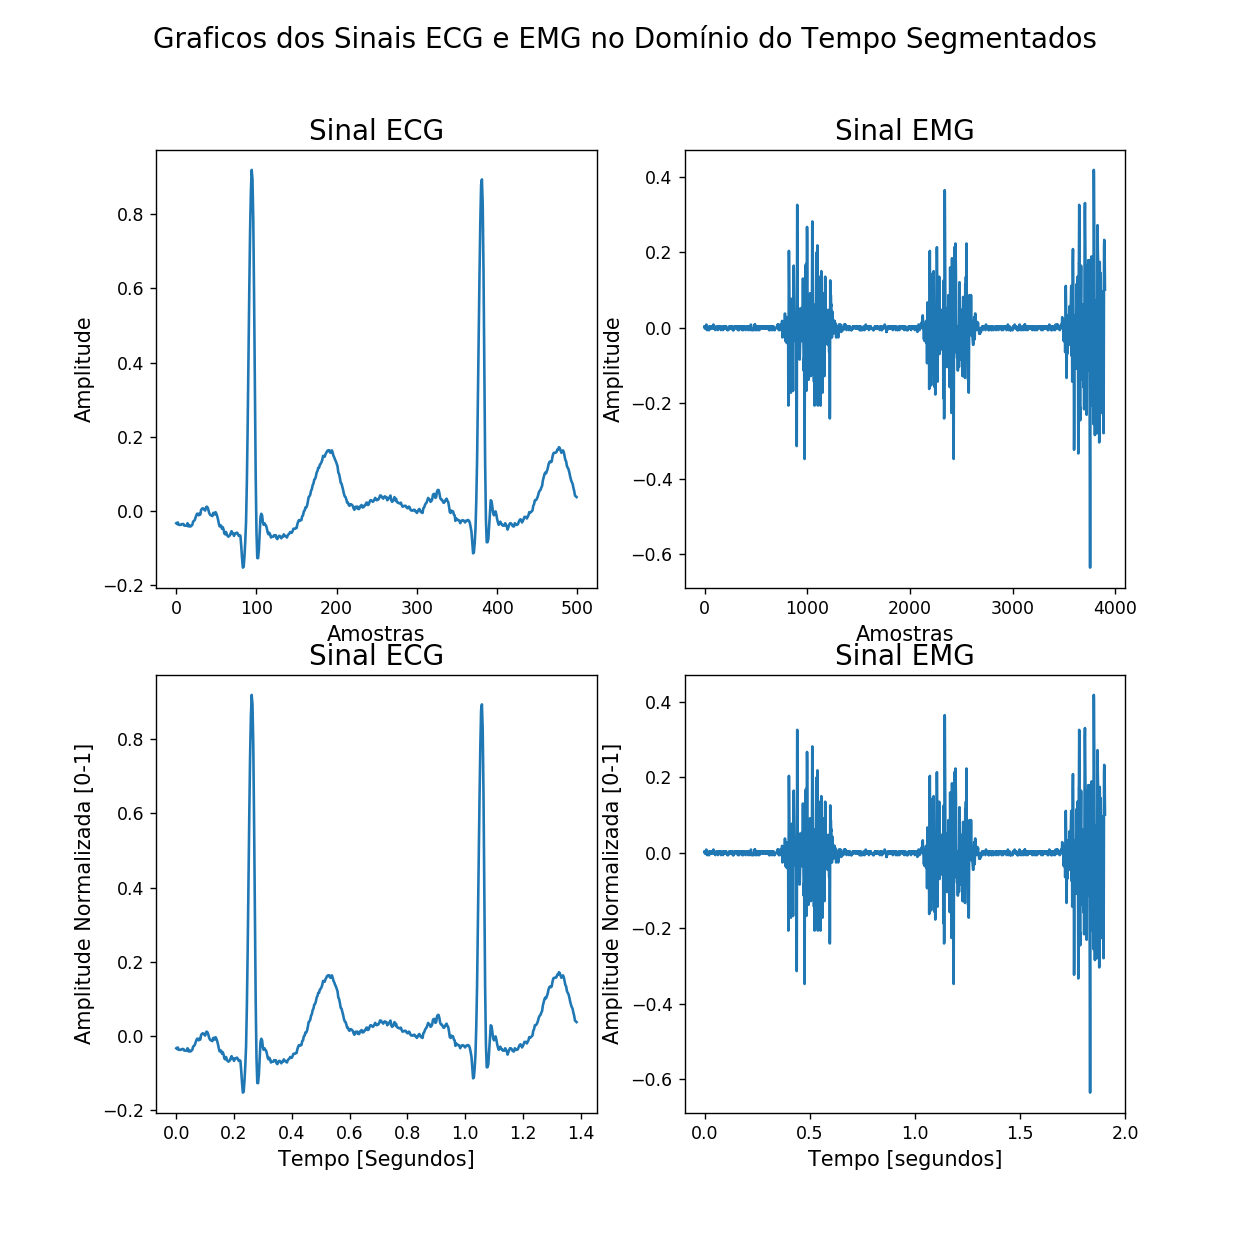

In [11]:
# Gráficos dos Sinais ECG e EMG segmentados

fig = plt.subplots(figsize=(10,10))

plt.suptitle('Graficos dos Sinais ECG e EMG no Domínio do Tempo Segmentados', fontsize=16)

ax1=plt.subplot(2, 2, 1)
ecg=lerecg('ECG')    
ax1.plot(ecg_seg)
ax1.set_xlabel("Amostras",fontsize=12)
ax1.set_title("Sinal ECG",fontsize=16)  
ax1.set_ylabel('Amplitude',fontsize=12)

ax2=plt.subplot(2, 2, 2)
emg=leremg('EMG')    
ax2.plot(emg_seg)
ax2.set_xlabel("Amostras",fontsize=12)
ax2.set_title("Sinal EMG",fontsize=16)  
ax2.set_ylabel('Amplitude',fontsize=12)

ax1=plt.subplot(2, 2, 3)
ecg=lerecg('ECG')    
fs=360
tempo=np.arange(0,len(ecg_seg)/fs,1/fs)
ax1.plot(tempo,ecg_seg)
ax1.set_xlabel("Tempo [Segundos]",fontsize=12)
ax1.set_title("Sinal ECG",fontsize=16)  
ax1.set_ylabel('Amplitude Normalizada [0-1]',fontsize=12)

ax2=plt.subplot(2, 2, 4)
fs=2048
tempo=np.arange(0,len(emg_seg)/fs,1/fs)
ax2.plot(tempo,emg_seg)
ax2.set_xlabel("Tempo [segundos]",fontsize=12)
ax2.set_title("Sinal EMG",fontsize=16)  
ax2.set_ylabel('Amplitude Normalizada [0-1]',fontsize=12)


plt.savefig(path+"Figura_3.jpeg",dpi=300)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

a) No Domínio do Tempo:

	03: Retificação, Normalização e regressão linear do sinal EMG;

In [13]:
sinal=[1,2,4,6,10]
sinal/np.max(sinal)


array([0.1, 0.2, 0.4, 0.6, 1. ])

<IPython.core.display.Javascript object>


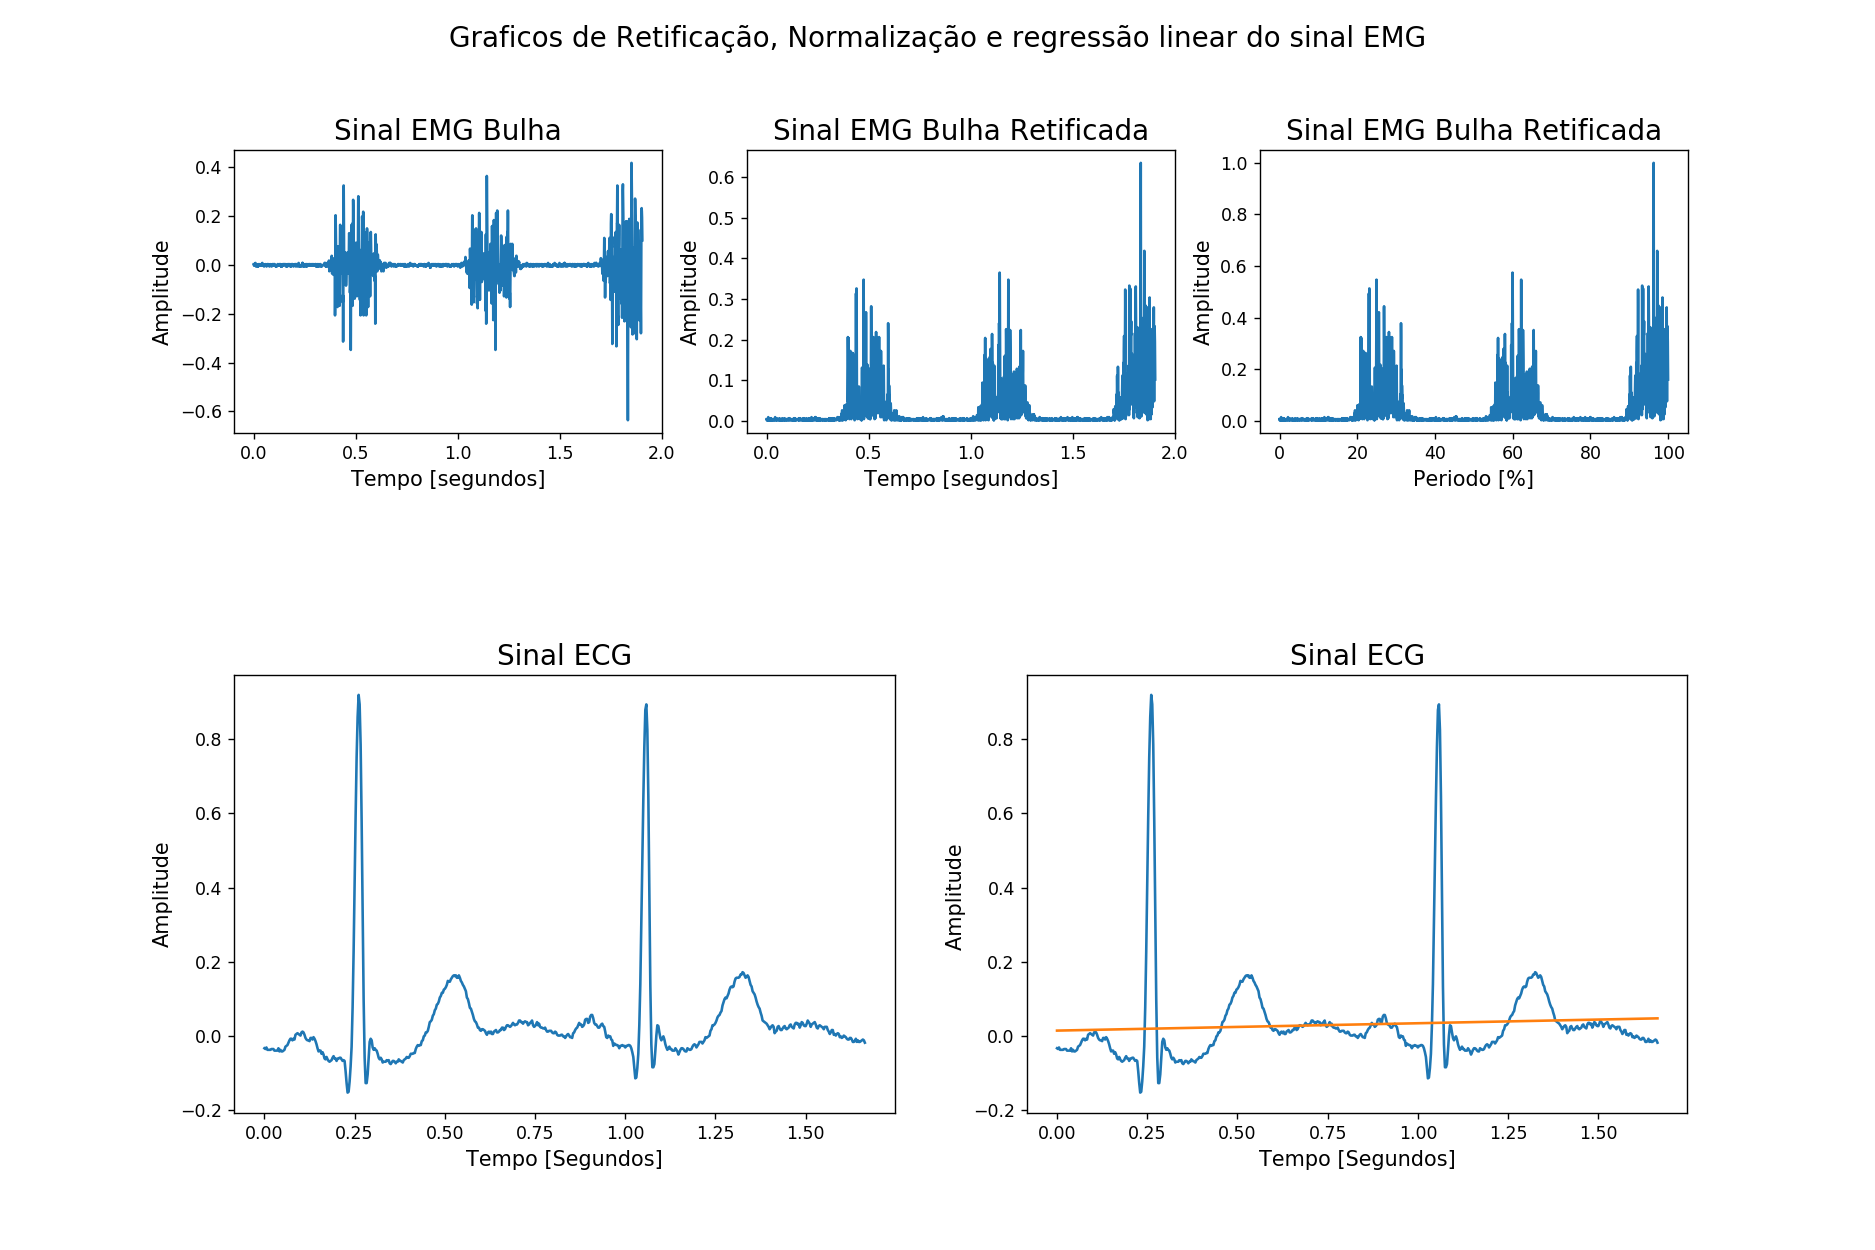

In [15]:
# Gráficos dos Sinais ECG e EMG segmentados

fig = plt.subplots(figsize=(15,10))

plt.suptitle('Graficos de Retificação, Normalização e regressão linear do sinal EMG', fontsize=16)

ax1=plt.subplot(3, 3, 1)
fs=2048
tempo=np.arange(0,len(emg_seg)/fs,1/fs)
ax1.plot(tempo,emg_seg)
ax1.set_xlabel("Tempo [segundos]",fontsize=12)
ax1.set_title("Sinal EMG Bulha",fontsize=16)  
ax1.set_ylabel('Amplitude',fontsize=12)

ax2=plt.subplot(3, 3, 2)
fs=2048
tempo=np.arange(0,len(emg_seg)/fs,1/fs)
ax2.plot(tempo,np.abs(emg_seg))
ax2.set_xlabel("Tempo [segundos]",fontsize=12)
ax2.set_title("Sinal EMG Bulha Retificada",fontsize=16)  
ax2.set_ylabel('Amplitude',fontsize=12)

ax3=plt.subplot(3, 3, 3)
fs=2048
tempon=np.arange(0,100,100/len(tempo))
ax3.plot(tempon,np.abs(emg_seg)/np.max(np.abs(emg_seg)))
ax3.set_xlabel("Periodo [%]",fontsize=12)
ax3.set_title("Sinal EMG Bulha Retificada",fontsize=16)  
ax3.set_ylabel('Amplitude',fontsize=12)

ax4=plt.subplot(2, 2, 3)
ecg=lerecg('ECG')    
ecg_seg=ecg[0:600]
fs=360
tempo=np.arange(0,len(ecg_seg)/fs,1/fs)
ax4.plot(tempo,ecg_seg)
ax4.set_xlabel("Tempo [Segundos]",fontsize=12)
ax4.set_title("Sinal ECG",fontsize=16)  
ax4.set_ylabel('Amplitude',fontsize=12)

ax5=plt.subplot(2, 2, 4)
x = tempo
y = ecg[0:600]
coef = np.polyfit(x, y, 1)
ax5.plot(tempo,ecg_seg)
ax5.plot(tempo,np.multiply(coef[0], x)+coef[1])
ax5.set_xlabel("Tempo [Segundos]",fontsize=12)
ax5.set_title("Sinal ECG",fontsize=16)  
ax5.set_ylabel('Amplitude ',fontsize=12)




plt.savefig(path+"Figura_4.jpeg",dpi=300)

In [16]:
coef

array([0.019819 , 0.0148657])

In [18]:
coef = np.polyfit(x, y, 2)
coef

array([-0.07407564,  0.14307263, -0.0192573 ])

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

b) No Domínio da Frequência:

04: Resposta em frequência e espectro de frequência dos sinais EMG e ECG;

<IPython.core.display.Javascript object>


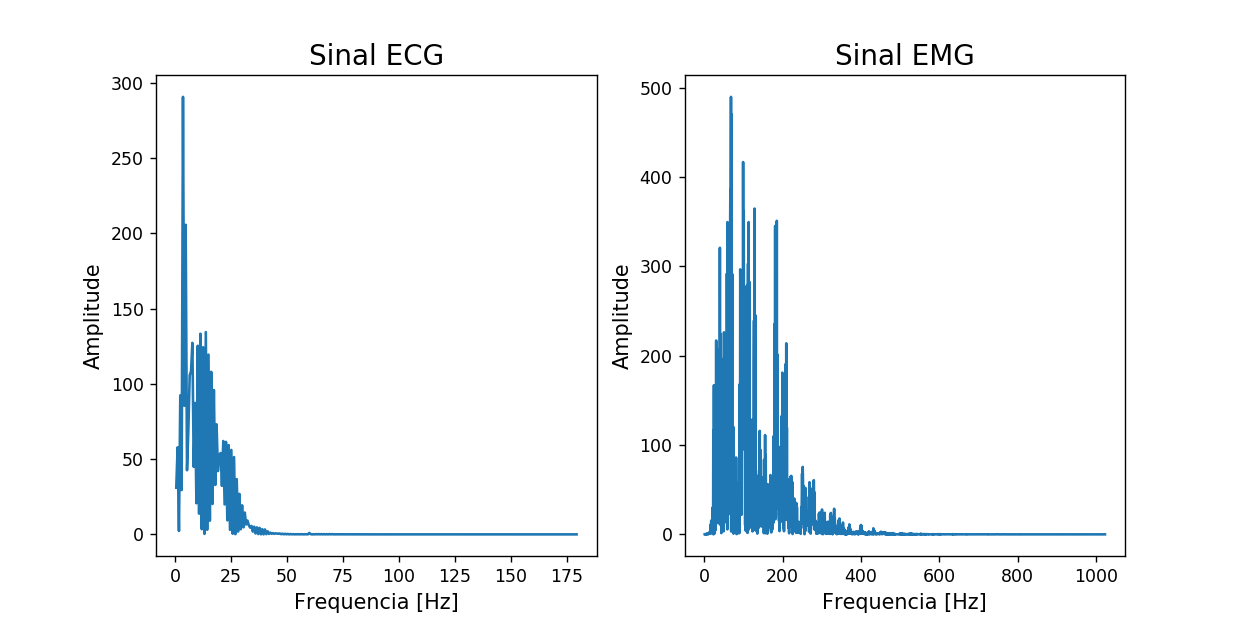

In [20]:
def power_frequency(sinal,fs): 
    ps = np.abs(np.fft.fft(sinal))**2
    time_step = 1 / fs
    freqs = np.fft.fftfreq(len(sinal), time_step)
    idx = np.argsort(freqs)
    FR_EMG=freqs[idx]
    PS_EMG=ps[idx]
    return FR_EMG, PS_EMG



fig = plt.subplots(figsize=(10,5))
fs=360
RF,PS=power_frequency(ecg_seg,fs)
ax1=plt.subplot(1,2, 1)
pos=np.min(np.where(RF>0))
ax1.plot(RF[pos:],PS[pos:])
#ax1.plot(RF,PS)
ax1.set_xlabel("Frequencia [Hz]",fontsize=12)
ax1.set_title("Sinal ECG",fontsize=16)  
ax1.set_ylabel('Amplitude',fontsize=12)

fs=2048
RF,PS=power_frequency(emg_seg,fs)
ax2=plt.subplot(1,2, 2)
pos=np.min(np.where(RF>0))
ax2.plot(RF[pos:],PS[pos:])
ax2.set_xlabel("Frequencia [Hz]",fontsize=12)
ax2.set_title("Sinal EMG",fontsize=16)  
ax2.set_ylabel('Amplitude',fontsize=12)


plt.savefig(path+"Figura_5.jpeg",dpi=300)


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

b) No Domínio da Frequência:

05: Aplicar o filtro Butterworth com frequência de corte em diferentes frequencias Hz;


<IPython.core.display.Javascript object>


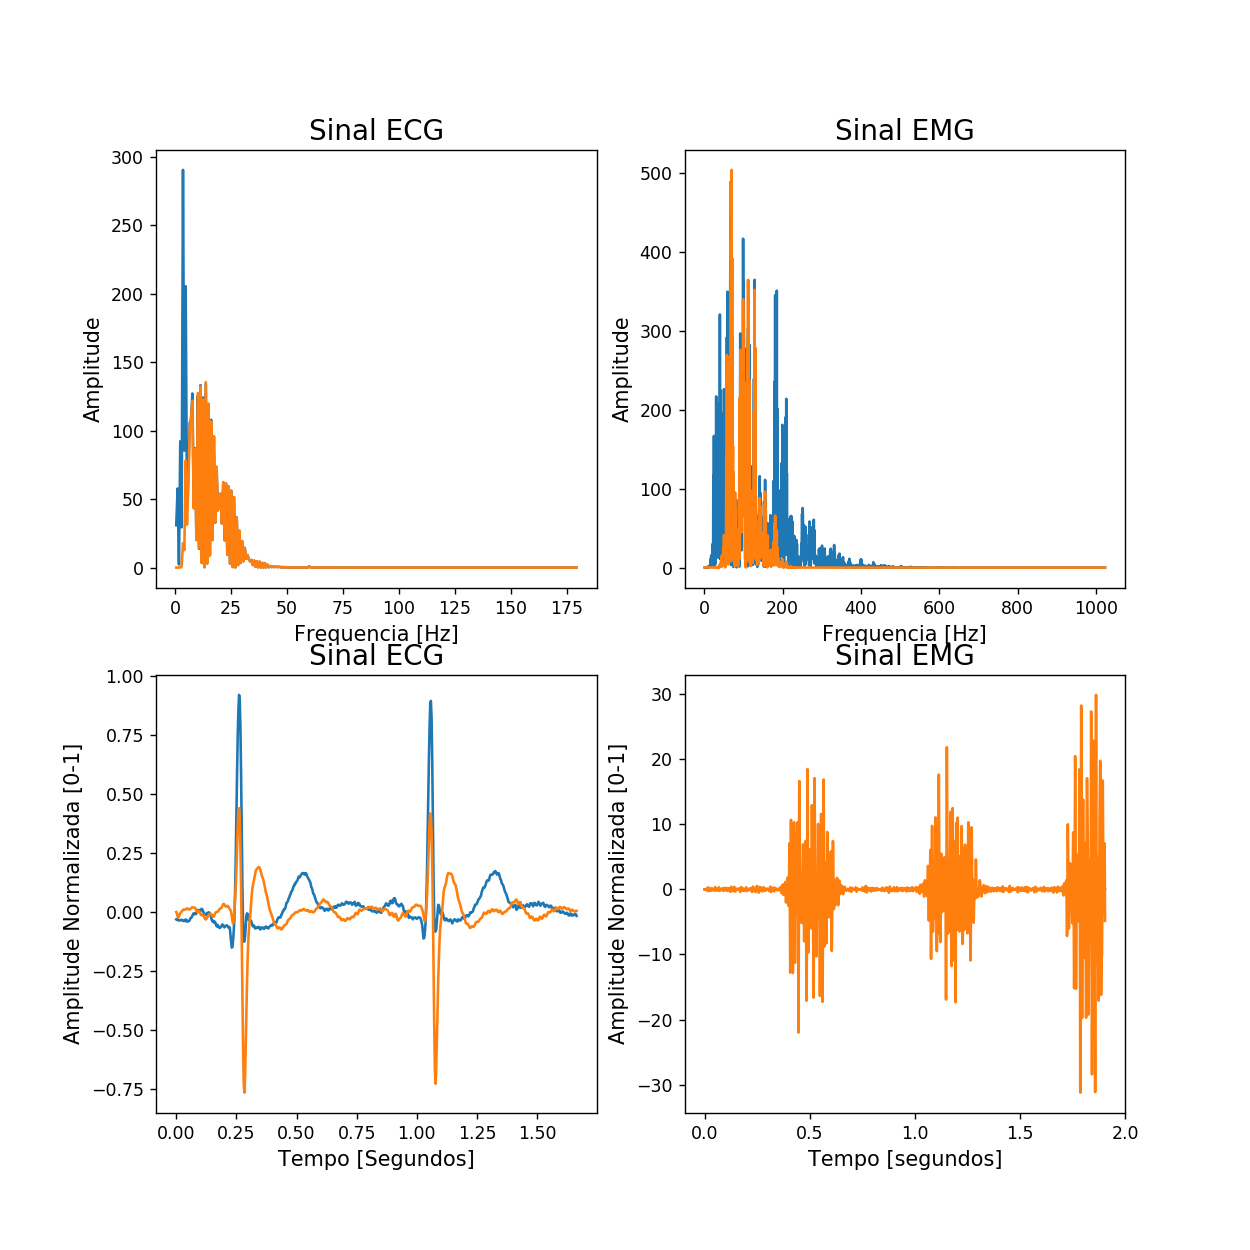

In [28]:
from scipy import signal

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a =signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y



fig = plt.subplots(figsize=(10,10))
fs=360
RF,PS=power_frequency(ecg_seg,fs)
ax1=plt.subplot(2,2, 1)
pos=np.min(np.where(RF>0))
ax1.plot(RF[pos:],PS[pos:])
lowcut=5
highcut=75
fs=360
ecg_seg_filter=butter_bandpass_filter(ecg_seg, lowcut, highcut, fs, order=4)
RF,PS=power_frequency(ecg_seg_filter,fs)
ax1.plot(RF[pos:],PS[pos:])
ax1.set_xlabel("Frequencia [Hz]",fontsize=12)
ax1.set_title("Sinal ECG",fontsize=16)  
ax1.set_ylabel('Amplitude',fontsize=12)

fs=2048
RF,PS=power_frequency(emg_seg,fs)
ax2=plt.subplot(2,2, 2)
pos=np.min(np.where(RF>0))
ax2.plot(RF[pos:],PS[pos:])
lowcut=55
highcut=165
fs=2048
emg_seg_filter=butter_bandpass_filter(emg_seg, lowcut, highcut, fs, order=4)
RF,PS=power_frequency(emg_seg_filter,fs)
ax2.plot(RF[pos:],PS[pos:])
ax2.set_xlabel("Frequencia [Hz]",fontsize=12)
ax2.set_title("Sinal EMG",fontsize=16)  
ax2.set_ylabel('Amplitude',fontsize=12)

ax3=plt.subplot(2,2, 3)
fs=360
tempo=np.arange(0,len(ecg_seg)/fs,1/fs)
ax3.plot(tempo,ecg_seg)
ax3.plot(tempo,ecg_seg_filter)
ax3.set_xlabel("Tempo [Segundos]",fontsize=12)
ax3.set_title("Sinal ECG",fontsize=16)  
ax3.set_ylabel('Amplitude Normalizada [0-1]',fontsize=12)

ax4=plt.subplot(2, 2, 4)
fs=2048
tempo=np.arange(0,len(emg_seg)/fs,1/fs)
ax4.plot(tempo,emg_seg)
ax4.plot(tempo,100*emg_seg_filter)
ax4.set_xlabel("Tempo [segundos]",fontsize=12)
ax4.set_title("Sinal EMG",fontsize=16)  
ax4.set_ylabel('Amplitude Normalizada [0-1]',fontsize=12)


plt.savefig(path+"Figura_6.jpeg",dpi=300)



XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

b) No Domínio da Frequência:
    
    06: Aplicar a FPM e RMS no sinal completo para cada bulha EMG.

<IPython.core.display.Javascript object>


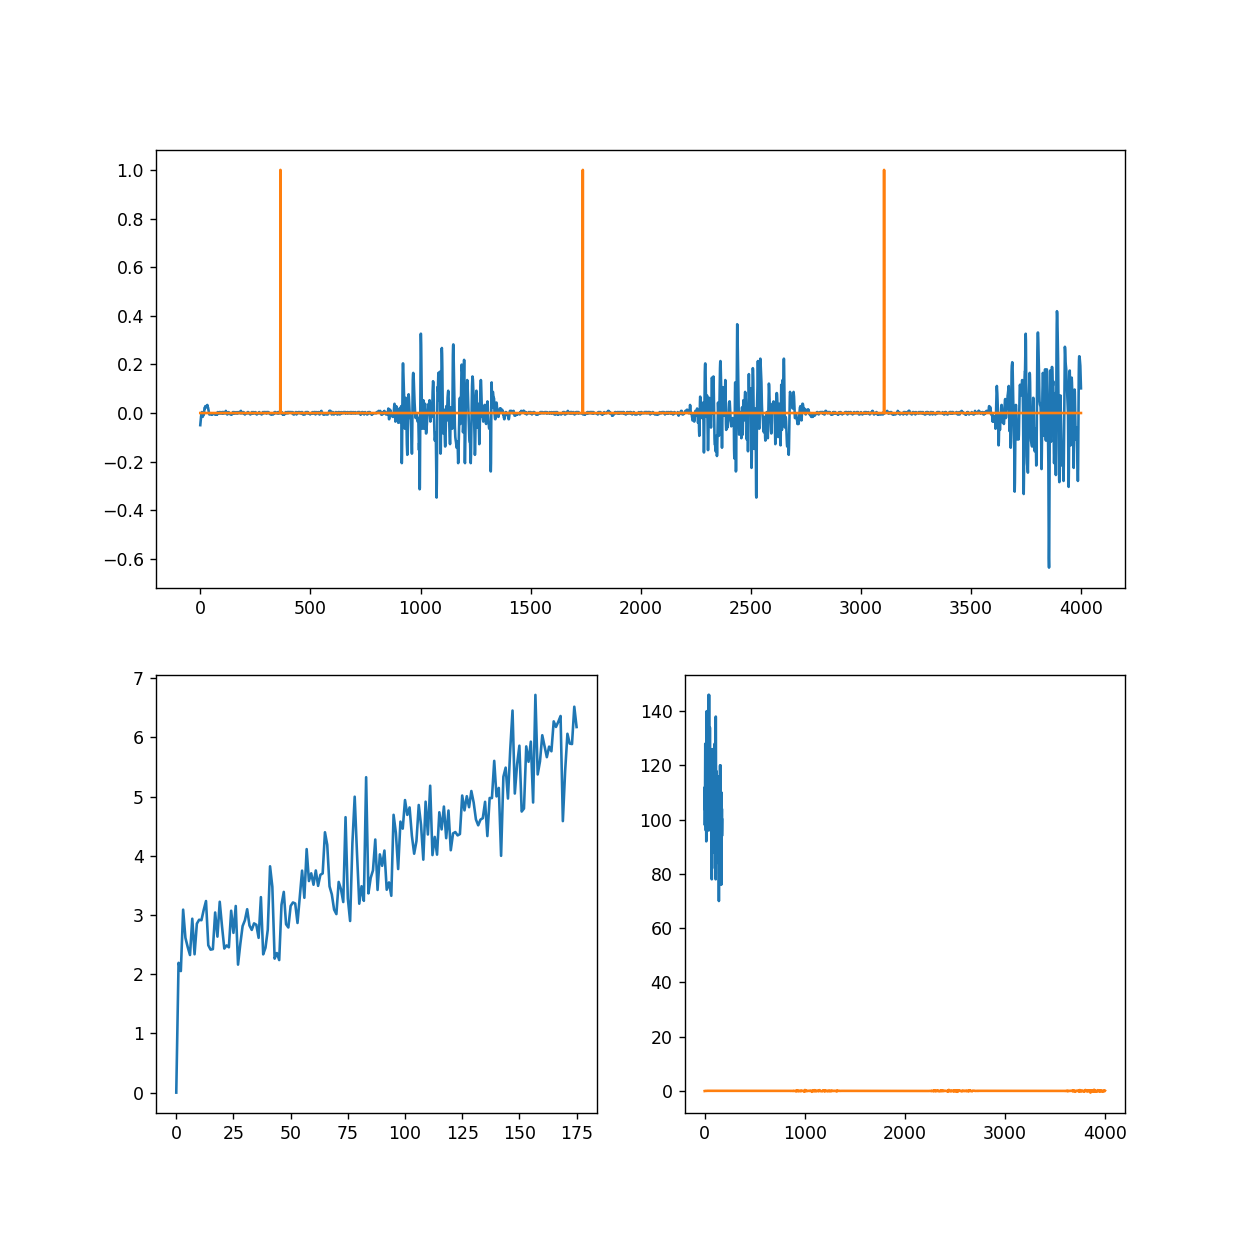

In [29]:
def lertg(arquivo):
    f = open(arquivo,'r',encoding='latin-1')
    lines = f.readlines()
    f.close()
    positions=list(np.where(pd.DataFrame(lines)=='# columns: 1\n'))[0]
    sinal1=lines[positions[2]+1:]
    tg=[int(sinal1[k][1:-1]) for k in range(len(sinal1)-4)]
    return tg

fig = plt.subplots(figsize=(10,10))

ax1=plt.subplot(2,1 ,1)
emg=leremg('EMG')
tg=lertg('EMG')
ax1.plot(emg[0:4000])
ax1.plot(tg[0:4000])

ax2=plt.subplot(2,2 ,3)
position_tg=np.where(pd.DataFrame(tg)==1)
emg_rms=[np.dot(emg[position_tg[0][i]-1024:position_tg[0][i]],emg[position_tg[0][i]-1024:position_tg[0][i]])**0.5 for i in range(len(position_tg[0]))]
ax2.plot(emg_rms)


FPM=[]
for i in range(1,len(position_tg[0])):
    emg_j=emg[position_tg[0][i]-1024:position_tg[0][i]]
    FR_EMG_J, PS_EMG_J=power_frequency(emg_j,2048)
    Na=int(np.round(len(PS_EMG_J)/2))
    FPM.append(FR_EMG_J[Na:][np.max(np.where(np.cumsum(PS_EMG_J[Na:])<np.sum(PS_EMG_J[Na:])/2))])

ax3=plt.subplot(2,2 ,4)

ax3.plot(FPM)


plt.savefig(path+"Figura_7.jpeg",dpi=300)


    

<IPython.core.display.Javascript object>


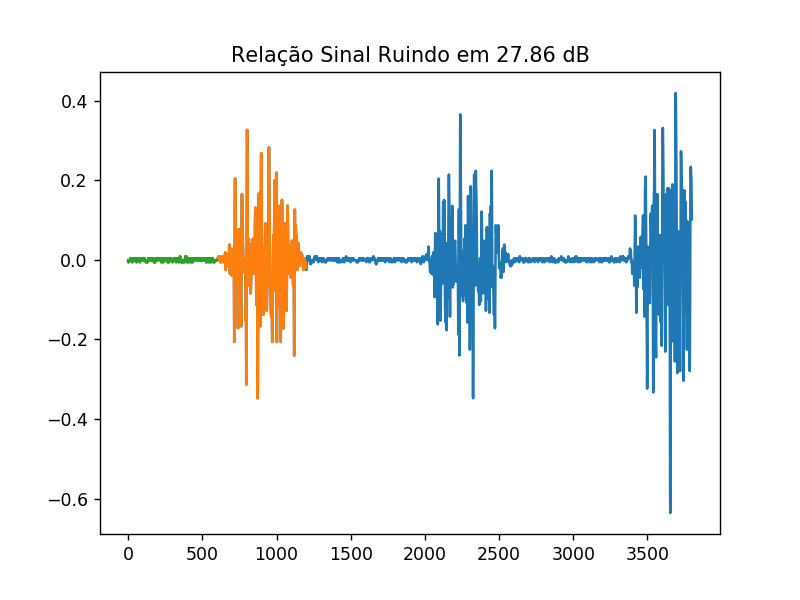

Text(0.5, 1.0, 'Relação Sinal Ruindo em 27.86 dB')

In [77]:
%matplotlib notebook 

plt.plot(emg[200:4000])

plt.plot(emg[200:1400])
plt.plot(emg[200:800])
S=emg[800:1400]
N=emg[200:800]
Srms=np.sum([np.dot(S[i],S[i])**0.5 for i in range(len(S))])
Nrms=np.sum([np.dot(N[i],N[i])**0.5 for i in range(len(N))])
[Srms,Nrms,Srms/Nrms, 20*np.log10(Srms/Nrms)]

plt.title("Relação Sinal Ruindo em "+str(round(20*np.log10(Srms/Nrms),2))+" dB")

In [57]:
emg

[-0.04990423975460345,
 -0.04013923975460365,
 -0.02549023975460329,
 -0.02060723975460377,
 -0.01084223975460397,
 -0.01084223975460397,
 -0.001076239754603137,
 0.00380676024539639,
 0.00380676024539639,
 -0.005959239754602663,
 -0.01572423975460246,
 -0.01572423975460246,
 -0.01084223975460397,
 -0.01084223975460397,
 -0.005959239754602663,
 -0.005959239754602663,
 -0.005959239754602663,
 -0.001076239754603137,
 0.008689760245397693,
 0.01845476024539749,
 0.01845476024539749,
 0.02333776024539702,
 0.02333776024539702,
 0.02822076024539655,
 0.02822076024539655,
 0.02822076024539655,
 0.02333776024539702,
 0.02822076024539655,
 0.02822076024539655,
 0.02822076024539655,
 0.02822076024539655,
 0.02822076024539655,
 0.03310376024539607,
 0.02822076024539655,
 0.02333776024539702,
 0.02333776024539702,
 0.01845476024539749,
 0.01357176024539619,
 0.008689760245397693,
 0.00380676024539639,
 -0.001076239754603137,
 -0.005959239754602663,
 -0.005959239754602663,
 -0.005959239754602663,


In [30]:
N=18 #Número de Alunos
result = []
while len(result) != N:
    r = np.random.randint(1, N+1)
    if r not in result:
        result.append(r)
print("Ordem de Apresentação: "+str(result))

Ordem de Apresentação: [4, 3, 18, 5, 2, 17, 7, 6, 8, 13, 14, 9, 15, 12, 11, 1, 16, 10]


In [ ]:
file='/home/mrclnndrd/Dropbox/UnB/Gama/Pos_graduação/lato/PDS/Atual/PDS_2018/ParaEnvio/Engenharia Clínica 2018 2019 Turma H.xlsx'
port = pd.ExcelFile(file)
df =port.parse('Plan1')
df.fillna(0, inplace=True)
df=df[df['Menção']==0]
Nomes=list(df.iloc[np.where(df[df.columns[2]]!=0)]['Nome '].values)
N=len(Nomes) #Número de Alunos
result = []
while len(result) != N:
    r = np.random.randint(1, N+1)
    if r not in result:
        result.append(r)
artigos=[' Artigo No ' +str(result[k]%7+1) +' destinado para o Aluno: '+Nomes[k] for k in range(len(result))]

print('Alocação aleatória do Artigo ao Aluno e Data de Entrega da Análise Crítica do Artigo 22/12/2018')
display(artigos)
print('E desejo ótimas festas e maravilhoso 2019')
